# 1 K-means Clustering

## 1.1 实现k-means算法

### 1.1.1 寻找最近的质心点 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
def find_closest_centroids(X,centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

测试一下上面的函数

In [3]:
data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X , initial_centroids)
idx[0:3]

array([0., 2., 1.])

### 1.1.2 计算质心均值

In [4]:
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])
data2.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


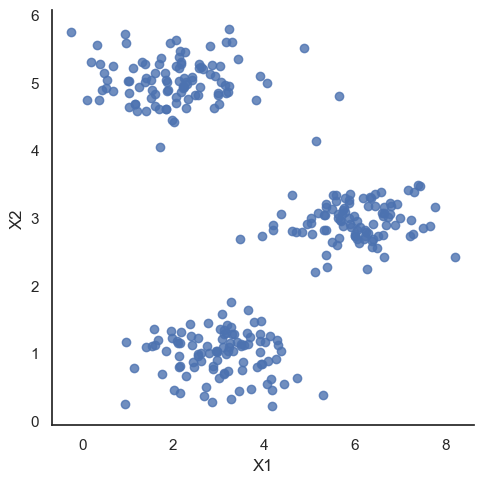

In [5]:
sb.set(context="notebook", style="white")
sb.lmplot( data=data2 , x='X1',y='X2',fit_reg=False)
plt.show()

In [6]:
def compute_centroids(X,idx,k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        indices = np.where(idx==i)
        #np.sum求和的是一个三维数组
        a = X[indices,:]
        # print(a.shape)
        centroids[i,:] = (np.sum(a,axis=1) / len(indices[0])).ravel()
    
    return centroids

In [7]:
compute_centroids(X,idx,3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 1.2 示例集上的k均值 

In [8]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [9]:
idx, centroids = run_k_means(X, initial_centroids, 10)

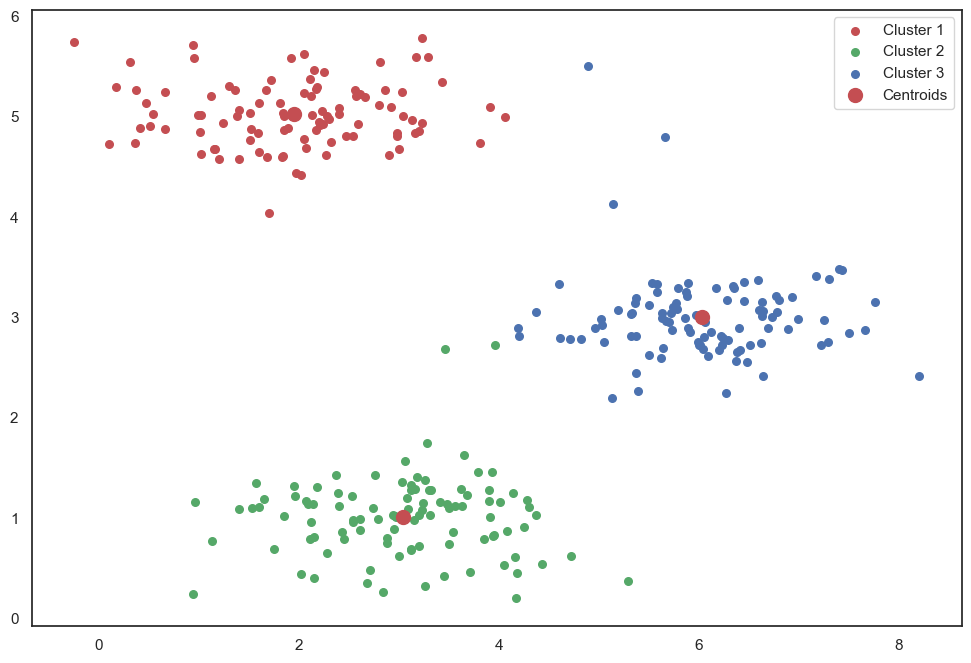

In [10]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(centroids[:,0],centroids[:,1],s=100,color = 'r',label='Centroids')
ax.legend()
plt.show()

## 1.3 随机化初始值 

In [11]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [12]:
init_centroids(X, 3)

array([[2.23454135, 5.05547168],
       [2.47053695, 4.80418944],
       [2.09517296, 1.14010491]])

## 1.4 k-means图片压缩 

### 1.4.1 像素上的kmeans 

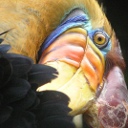

In [13]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [14]:
image_data = loadmat('data/bird_small.mat')
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [15]:
A = image_data['A']
A.shape

(128, 128, 3)

In [16]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [17]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape,centroids.shape

((16384, 3), (16, 3))

In [18]:
# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

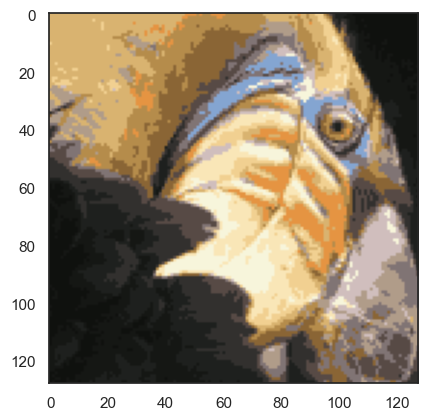

In [19]:
plt.imshow(X_recovered)
plt.show()

您可以看到我们对图像进行了压缩，但图像的主要特征仍然存在。 这就是K-means。 下面我们来用scikit-learn来实现K-means。

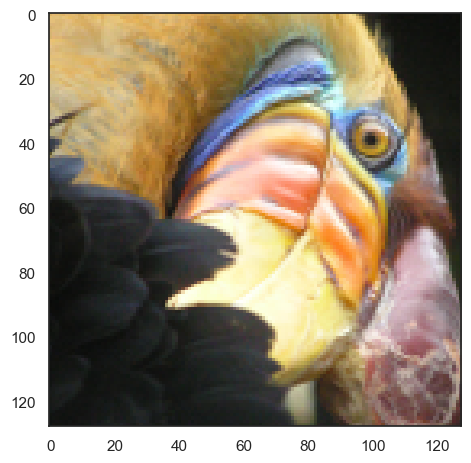

In [20]:
from skimage import io

# cast to float, you need to do this otherwise the color would be weird after clustring
pic = io.imread('data/bird_small.png') / 255.
io.imshow(pic)
plt.show()

In [21]:
pic.shape

(128, 128, 3)

In [22]:
# serialize data
data = pic.reshape(128*128, 3)

In [23]:
data.shape

(16384, 3)

In [24]:
from sklearn.cluster import KMeans #导入kmeans库

model = KMeans(n_clusters=16, n_init=100)

In [25]:
model.fit(data)

KMeans(n_clusters=16, n_init=100)

In [26]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [27]:
centroids[C].shape

(16384, 3)

In [28]:
compressed_pic = centroids[C].reshape((128,128,3))

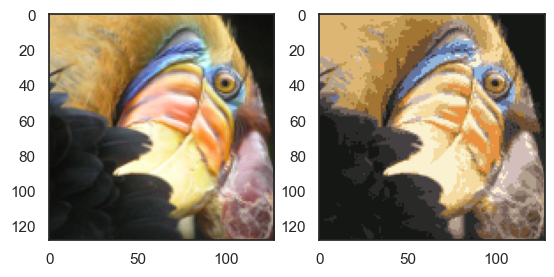

In [29]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()